## Classification with **Logistic Regression**
by: nateghiiman@gmail.com

**Machine Learning With Python** Course 2nd Project

In [2]:
import pandas as pd

In [9]:
df=pd.read_csv("C:/python/Jadi_ML/01 Iman/3-1 heart.csv" ,index_col=False)
x=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y=df['output'].values
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)

Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Model Training

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat = LR.predict(x_test)
yhat

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [15]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob

array([[0.85772787, 0.14227213],
       [0.38355619, 0.61644381],
       [0.67918039, 0.32081961],
       [0.83966222, 0.16033778],
       [0.69938436, 0.30061564],
       [0.83935371, 0.16064629],
       [0.83359005, 0.16640995],
       [0.48262394, 0.51737606],
       [0.85348208, 0.14651792],
       [0.20463865, 0.79536135],
       [0.52776134, 0.47223866],
       [0.68767946, 0.31232054],
       [0.37674878, 0.62325122],
       [0.63817858, 0.36182142],
       [0.58842994, 0.41157006],
       [0.31489463, 0.68510537],
       [0.16243422, 0.83756578],
       [0.78516325, 0.21483675],
       [0.39785467, 0.60214533],
       [0.38587911, 0.61412089],
       [0.21144448, 0.78855552],
       [0.76622551, 0.23377449],
       [0.4175562 , 0.5824438 ],
       [0.25154198, 0.74845802],
       [0.23903737, 0.76096263],
       [0.35655434, 0.64344566],
       [0.85982665, 0.14017335],
       [0.18698952, 0.81301048],
       [0.30718475, 0.69281525],
       [0.18249449, 0.81750551],
       [0.

Evaluation

In [16]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5882352941176471

plot
this part is copied

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[27  4]
 [10 20]]


Confusion matrix, without normalization
[[27  4]
 [10 20]]


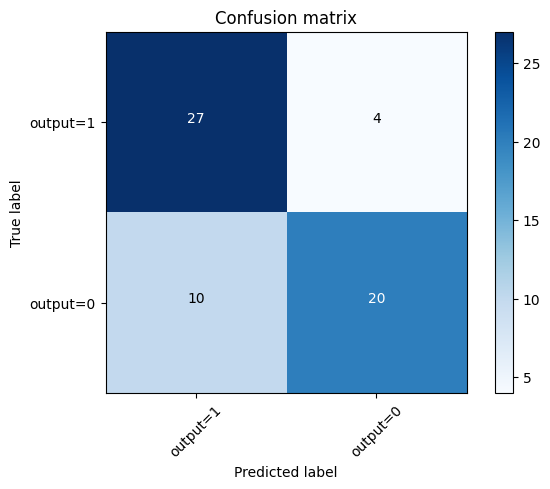

In [24]:
# Compute confusion matrix
import  numpy as np
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

In [25]:
from sklearn import metrics
print(metrics.classification_report(yhat,y_test))
print(metrics.confusion_matrix(yhat,y_test))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.87      0.73      0.79        37

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61

[[20  4]
 [10 27]]
